In [1]:

import xarray as xa
import netCDF4 as nc
import pandas as pd
import numpy as np

import cmocean

/Volumes/WDC_internal/Users/bell/anaconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2019-03-01 11:10:51.520942


In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
clist = list(colors.keys())


In [4]:
### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
#max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

mpl.rcParams['contour.negative_linestyle'] = 'solid'


Load data from NetCDF Archive

In [33]:
archive_path = '/Volumes/Archive/ecoraid/NonEcoFOCI_ProjectData/ArcticHeat/ALAMO/netcdf/'
AlamoID = '11018'
dataxa = xa.open_mfdataset(archive_path + AlamoID + '/*.nc', concat_dim='N_LEVELS')

dataxa

<xarray.Dataset>
Dimensions:              (N_LEVELS: 236497, N_PARAM: 3, N_PROF: 1)
Dimensions without coordinates: N_LEVELS, N_PARAM, N_PROF
Data variables:
    PLATFORM_NUMBER      (N_LEVELS, N_PROF) object dask.array<shape=(236497, 1), chunksize=(854, 1)>
    FLOAT_SERIAL_NO      (N_LEVELS, N_PROF) object dask.array<shape=(236497, 1), chunksize=(854, 1)>
    CYCLE_NUMBER         (N_LEVELS, N_PROF) float64 dask.array<shape=(236497, 1), chunksize=(854, 1)>
    STATION_PARAMETERS   (N_LEVELS, N_PROF, N_PARAM) object dask.array<shape=(236497, 1, 3), chunksize=(854, 1, 3)>
    REFERENCE_DATE_TIME  (N_LEVELS) object b'19500101000000' ... b'19500101000000'
    JULD                 (N_LEVELS, N_PROF) datetime64[ns] dask.array<shape=(236497, 1), chunksize=(854, 1)>
    JULD_LOCATION        (N_LEVELS, N_PROF) datetime64[ns] dask.array<shape=(236497, 1), chunksize=(854, 1)>
    LATITUDE             (N_LEVELS, N_PROF) float64 dask.array<shape=(236497, 1), chunksize=(854, 1)>
    LONGITUDE      

In [34]:
dataxa=dataxa.persist()

In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



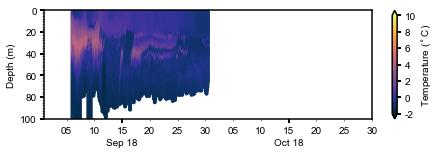

In [36]:

from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter  # useful for `logit` scale


fig, ax1 = plt.subplots(figsize=(6.5, 2.25))
cs = ax1.scatter(dataxa['JULD'].values[~np.isnat(dataxa['JULD'])], 
            dataxa['PRES'].values.T[~np.isnat(dataxa['JULD'])], 
            s=15, c=dataxa['TEMP'].values.T[~np.isnat(dataxa['JULD'])], 
            marker='o', edgecolor='none', vmin=-2, vmax=10, cmap=cmocean.cm.thermal)

cbar = fig.colorbar(cs, ticks=[-2, 0, 2, 4, 6, 8, 10], orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
cbar.ax.set_yticklabels([-2, 0, 2, 4, 6, 8, 10])
ax1.set_ylabel('Depth (m)')
#ax1.set_xlabel('Date (UTC)')

ax1.invert_yaxis()
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
ax1.xaxis.set_minor_locator(DayLocator(bymonthday=range(0,31,5)))
ax1.xaxis.set_major_formatter(ticker.NullFormatter())
ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
ax1.xaxis.set_major_formatter(DateFormatter('%b %y'))
ax1.xaxis.set_tick_params(which='major', pad=15)
ax1.xaxis.set_tick_params(which='minor', pad=5)
ax1.set_xlim([datetime.datetime(2018,9,1),datetime.datetime(2018,10,30)])
ax1.set_ylim([100,0])

fig.tight_layout()
fig.savefig('arctic_heat_alamo_profiles_'+AlamoID+'.kwood.png',dpi=300)
fig.savefig('arctic_heat_alamo_profiles_'+AlamoID+'.kwood.svg',dpi=300) 

Text(0.5, 0, 'Alamo 9085')

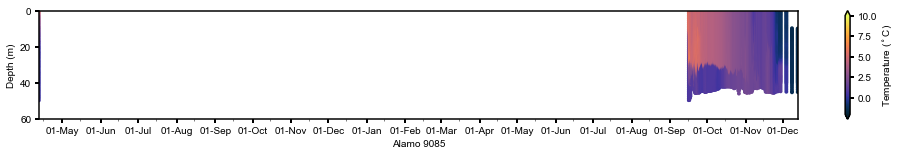

In [14]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dataxa['JULD'].values[~np.isnat(dataxa['JULD'])], 
                dataxa['PRES'].values.T[~np.isnat(dataxa['JULD'])], 
                s=15, c=dataxa['TEMP'].values.T[~np.isnat(dataxa['JULD'])], 
                marker='o', edgecolor='none', vmin=-2, vmax=10, cmap=cmocean.cm.thermal)

ax.invert_yaxis()
ax.set_xlim(dataxa['JULD'].values[~np.isnat(dataxa['JULD'])][0],
            dataxa['JULD'].values[~np.isnat(dataxa['JULD'])][-1])

ax.set_ylim([60,0])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(1))
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_minor_locator(DayLocator(15))
ax.xaxis.set_minor_formatter(NullFormatter())

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Alamo '+AlamoID)

In [76]:
fig.savefig('Alamo '+AlamoID+'_TEMP.svg',dpi=300)
fig.savefig('Alamo '+AlamoID+'_TEMP.png',dpi=300)

Text(0.5, 0, 'Alamo 9199')

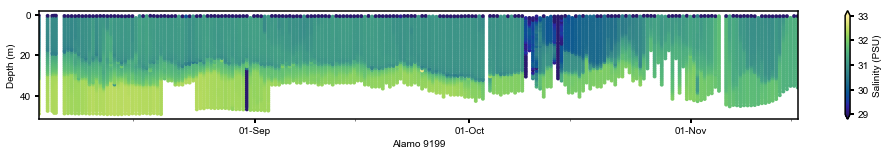

In [77]:
fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(dataxa['JULD'].values[~np.isnat(dataxa['JULD'])], 
                dataxa['PRES'].values.T[~np.isnat(dataxa['JULD'])], 
                s=15, c=dataxa['PSAL'].values.T[~np.isnat(dataxa['JULD'])], 
                marker='o', edgecolor='none', vmin=29, vmax=33, cmap=cmocean.cm.haline)

ax.invert_yaxis()
ax.set_xlim(dataxa['JULD'].values[~np.isnat(dataxa['JULD'])][0],
            dataxa['JULD'].values[~np.isnat(dataxa['JULD'])][-1])

xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(1))
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_minor_locator(DayLocator(15))
ax.xaxis.set_minor_formatter(NullFormatter())

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity (PSU)')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Alamo '+AlamoID)

In [78]:
fig.savefig('Alamo '+AlamoID+'_PSAL.svg',dpi=300)
fig.savefig('Alamo '+AlamoID+'_PSAL.png',dpi=300)

In [79]:
def plot_temperature():
    dgb = dataxa.groupby('CYCLE_NUMBER')

    depth_array = np.arange(0,601,1)
    temparray = np.ones((len(dgb.groups.keys()),len(depth_array)))*np.nan
    ProfileTime = []
    cycle_col = 0

    fig, ax1 = plt.subplots(figsize=(18, 12), facecolor='w', edgecolor='w')

    for k,cycle in enumerate(dgb.groups):

        #if first time is 'NaT' - skip dive
        if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):
            temp_time =  dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle]
            ProfileTime = ProfileTime + [temp_time]
            #remove where pressure may be unknown
            Pressure = dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle]
            Temperature = dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle]
            #sometimes v1 works and other times v2 does
            #v1
            #temparray[cycle_col,:]  = np.interp(depth_array,np.flip(Pressure),np.flip(Temperature),left=np.nan,right=np.nan)
            #v2
            #v2
            if ~(np.isnan(np.interp(depth_array,np.flip(Pressure),np.flip(Temperature),left=np.nan,right=np.nan)).all()):
                temparray[cycle_col,:]  = np.interp(np.flip(depth_array),Pressure,Temperature,left=np.nan,right=np.nan)
            else:
                temparray[cycle_col,:]  = np.interp(depth_array,Pressure,Temperature,left=np.nan,right=np.nan)

            if cycle > 100:
                temparray[cycle_col,:] = np.nan
                
            cycle_col +=1


            ###plot black dots at sample points
            #plt.scatter(x=temp_time.data, y=Pressure,s=1,marker='.', edgecolors='none', c='k', zorder=3, alpha=1)
            ###plot colored dots at sample points with colorscheme based on  variable value
            plt.scatter(x=temp_time, y=Pressure,s=30,marker='.', edgecolors='none', c=Temperature, 
              vmin=-2, vmax=10, cmap=cmocean.cm.thermal, zorder=2)
        else:
            print("empty")
            temparray = np.delete(temparray, -1, axis=0)

    time_array = np.array([x[0] for x in ProfileTime])
    cs = plt.contourf(time_array,depth_array,temparray.T, 
        extend='both', cmap=cmocean.cm.thermal, 
        levels=np.arange(-2,10.25,0.25), alpha=0.9,zorder=1)
    cbar = fig.colorbar(cs, ticks=range(-2,12,2), orientation='vertical', extend='both')
    cbar.ax.set_ylabel('Temperature ($^\circ$C)', fontsize=18)
    cbar.ax.set_yticklabels(['-2','0','2','4','6','8','10'], fontsize=18)

    #plt.contour(time_array,depth_array,temparray.T,np.arange(-2,11,1), colors='#d3d3d3',
    #            linewidths=1, alpha=1.0,zorder=3)

    ax1.invert_yaxis()
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(100))
    ax1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
    ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
    ax1.xaxis.set_minor_locator(DayLocator(bymonthday=range(0,31,5)))
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax1.xaxis.set_major_formatter(DateFormatter('%b %y'))
    ax1.xaxis.set_tick_params(which='major', pad=25)
    ax1.xaxis.set_tick_params(which='minor', pad=5)
    #ax1.set_xlim([datetime.datetime(2018,6,15),datetime.datetime(2018,12,30)])
    ax1.set_ylim([50,0])

    plt.tight_layout()
    fig.savefig(AlamoID+'.png',dpi=300)
    fig.savefig(AlamoID+'.svg',dpi=300)
    
def plot_salinity():
    dgb = dataxa.groupby('CYCLE_NUMBER')

    depth_array = np.arange(0,601,1)
    temparray = np.ones((len(dgb.groups.keys()),len(depth_array)))*np.nan
    ProfileTime = []
    cycle_col = 0

    fig, ax1 = plt.subplots(figsize=(18, 4), facecolor='w', edgecolor='w')

    for k,cycle in enumerate(dgb.groups):

        #if first time is 'NaT' - skip dive
        if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):
            temp_time =  dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle]
            ProfileTime = ProfileTime + [temp_time]
            #remove where pressure may be unknown
            Pressure = dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle]
            Salinity = dataxa.PSAL.values.T[dataxa.CYCLE_NUMBER==cycle]
            #sometimes v1 works and other times v2 does
            #v1
            #temparray[cycle_col,:]  = np.interp(depth_array,np.flip(Pressure),np.flip(Temperature),left=np.nan,right=np.nan)
            #v2
            #v2
            if ~(np.isnan(np.interp(depth_array,np.flip(Pressure),np.flip(Salinity),left=np.nan,right=np.nan)).all()):
                temparray[cycle_col,:]  = np.interp(np.flip(depth_array),Pressure,Salinity,left=np.nan,right=np.nan)
            else:
                temparray[cycle_col,:]  = np.interp(depth_array,Pressure,Salinity,left=np.nan,right=np.nan)

            if cycle > 100:
                temparray[cycle_col,:] = np.nan
                
            cycle_col +=1


            ###plot black dots at sample points
            #plt.scatter(x=temp_time.data, y=Pressure,s=1,marker='.', edgecolors='none', c='k', zorder=3, alpha=1)
            ###plot colored dots at sample points with colorscheme based on  variable value
            plt.scatter(x=temp_time, y=Pressure,s=30,marker='.', edgecolors='none', c=Salinity, 
              vmin=29, vmax=36, cmap=cmocean.cm.haline, zorder=2)
        else:
            print("empty")
            temparray = np.delete(temparray, -1, axis=0)

    time_array = np.array([x[0] for x in ProfileTime])
    cs = plt.contourf(time_array,depth_array,temparray.T,np.arange(29,36.25,0.25), 
        extend='both', cmap=cmocean.cm.haline, alpha=0.9,zorder=1)
    cbar = fig.colorbar(cs, ticks=range(29,37,1), orientation='vertical', extend='both')
    cbar.ax.set_ylabel('Salinity ($^\circ$C)', fontsize=18)
    #cbar.ax.set_yticklabels(['-2','0','2','4','6','8','10'], fontsize=18)
    cbar.ax.tick_params(labelsize=18)
    #plt.contour(time_array,depth_array,temparray.T,np.arange(-2,11,1), colors='#d3d3d3',
    #            linewidths=1, alpha=1.0,zorder=3)

    ax1.invert_yaxis()
    ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
    ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
    ax1.xaxis.set_minor_locator(DayLocator(bymonthday=range(0,31,5)))
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax1.xaxis.set_major_formatter(DateFormatter('%b %y'))
    ax1.xaxis.set_tick_params(which='major', pad=25)
    ax1.xaxis.set_tick_params(which='minor', pad=5)
    #ax1.set_xlim([datetime.datetime(2018,6,15),datetime.datetime(2018,12,30)])
    ax1.set_ylim([50,0])

    plt.tight_layout()
    fig.savefig(AlamoID+'_sal.png',dpi=300)
    fig.savefig(AlamoID+'_sal.svg',dpi=300)

In [80]:
def plot_temperature_saloverlay():
    dgb = dataxa.groupby('CYCLE_NUMBER')

    depth_array = np.arange(0,61,1)
    temparray = np.ones((len(dgb.groups.keys()),len(depth_array)))*np.nan
    temparrays = np.ones((len(dgb.groups.keys()),len(depth_array)))*np.nan
    ProfileTime = []
    cycle_col = 0

    fig, ax1 = plt.subplots(figsize=(18, 4), facecolor='w', edgecolor='w')

    for k,cycle in enumerate(dgb.groups):
        if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):
            temp_time =  dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle]
            ProfileTime = ProfileTime + [temp_time]
            #remove where pressure may be unknown
            Pressure = dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle]
            Temperature = dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle]
            Salinity = dataxa.PSAL.values.T[dataxa.CYCLE_NUMBER==cycle]

            #sometimes v1 works and other times v2 does
            #v1
            #temparray[cycle_col,:]  = np.interp(depth_array,np.flip(Pressure),np.flip(Temperature),left=np.nan,right=np.nan)
            #temparrays[cycle_col,:]  = np.interp(depth_array,np.flip(Pressure),np.flip(Salinity),left=np.nan,right=np.nan)
            #v2
            if ~(np.isnan(np.interp(depth_array,np.flip(Pressure),np.flip(Temperature),left=np.nan,right=np.nan)).all()):
                temparray[cycle_col,:]  = np.interp(np.flip(depth_array),Pressure,Temperature,left=np.nan,right=np.nan)
                temparrays[cycle_col,:]  = np.interp(np.flip(depth_array),Pressure,Salinity,left=np.nan,right=np.nan)
            else:
                temparray[cycle_col,:]  = np.interp(depth_array,Pressure,Temperature,left=np.nan,right=np.nan)
                temparrays[cycle_col,:]  = np.interp(depth_array,Pressure,Salinity,left=np.nan,right=np.nan)
            if cycle > 100:
                temparray[cycle_col,:] = np.nan
                temparrays[cycle_col,:] = np.nan

            cycle_col +=1

            ###plot black dots at sample points
            #plt.scatter(x=temp_time.data, y=Pressure,s=1,marker='.', edgecolors='none', c='k', zorder=3, alpha=1)
            ###plot colored dots at sample points with colorscheme based on  variable value
            plt.scatter(x=temp_time, y=Pressure,s=30,marker='.', edgecolors='none', c=Temperature, 
              vmin=-2, vmax=10, cmap=cmocean.cm.thermal, zorder=2)
        else:
            print("empty")
            temparray = np.delete(temparray, -1, axis=0)
            temparrays = np.delete(temparrays, -1, axis=0)

            
    time_array = np.array([x[0] for x in ProfileTime])
    cs = plt.contourf(time_array,depth_array,temparray.T, 
        extend='both', cmap=cmocean.cm.thermal, 
        levels=np.arange(-2,10.25,0.25), alpha=0.9,zorder=1)
    cbar = fig.colorbar(cs, ticks=range(-2,12,2), orientation='vertical', extend='both')
    cbar.ax.set_ylabel('Temperature ($^\circ$C)')

    plt.contour(time_array,depth_array,temparray.T,np.arange(-2,10,1), colors='#d3d3d3',linewidths=1, alpha=0.5,zorder=3)

    CS=plt.contour(time_array,depth_array,temparrays.T,np.arange(30,33,0.5),linewidths=1.0, linestyles='dashed',colors='#000000',zorder=4)
    plt.clabel(CS, inline=1, fontsize=16, fmt='%1.2f')

    ax1.invert_yaxis()
    ax1.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
    ax1.xaxis.set_major_locator(DayLocator(bymonthday=15))
    ax1.xaxis.set_minor_locator(DayLocator(bymonthday=range(0,31,5)))
    ax1.xaxis.set_major_formatter(ticker.NullFormatter())
    ax1.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax1.xaxis.set_major_formatter(DateFormatter('%b %y'))
    ax1.xaxis.set_tick_params(which='major', pad=25)
    ax1.xaxis.set_tick_params(which='minor', pad=5)
    #ax1.set_xlim([datetime.datetime(2018,6,15),datetime.datetime(2018,12,30)])
    ax1.set_ylim([50,0])

    fig.savefig(AlamoID+'_TS.png',dpi=300)
    fig.savefig(AlamoID+'_TS.svg',dpi=300)

empty
empty
empty
empty
empty
empty


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


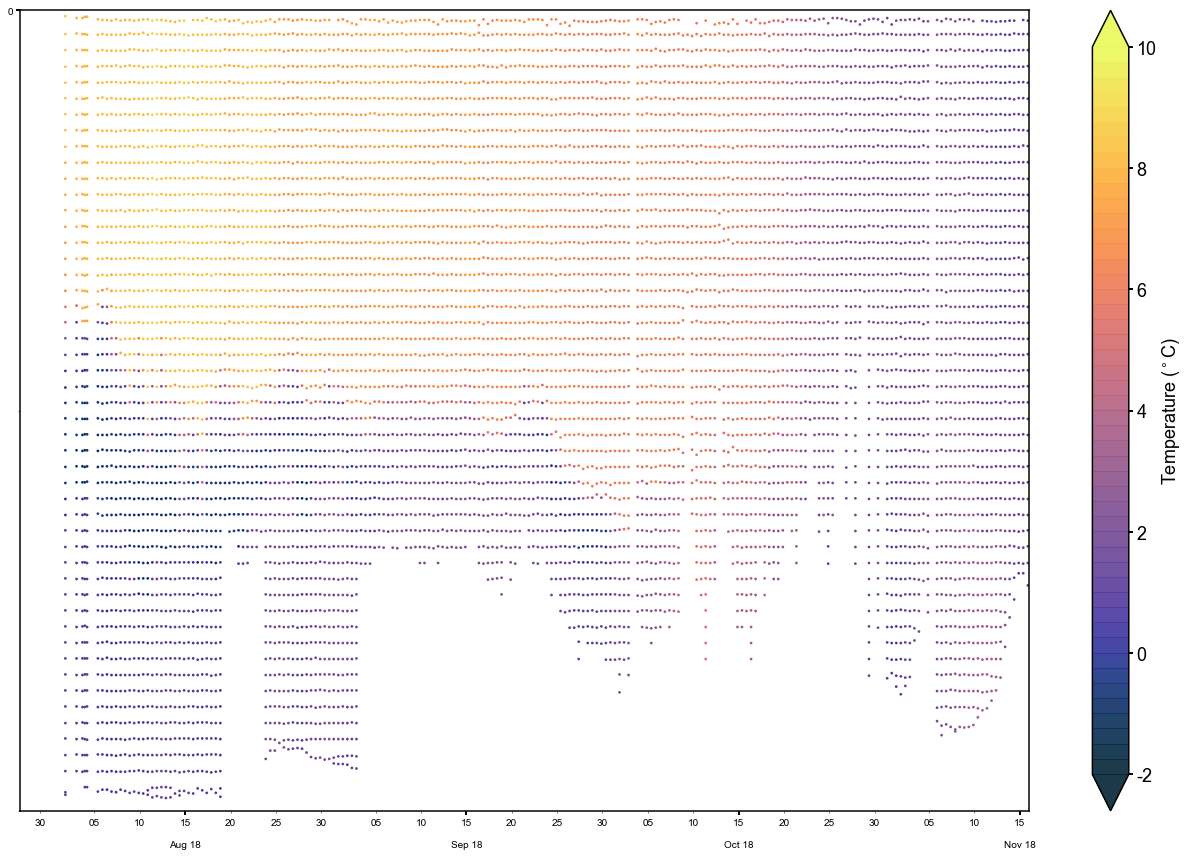

In [81]:
plot_temperature()
#plot_salinity()

empty
empty
empty
empty
empty
empty


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


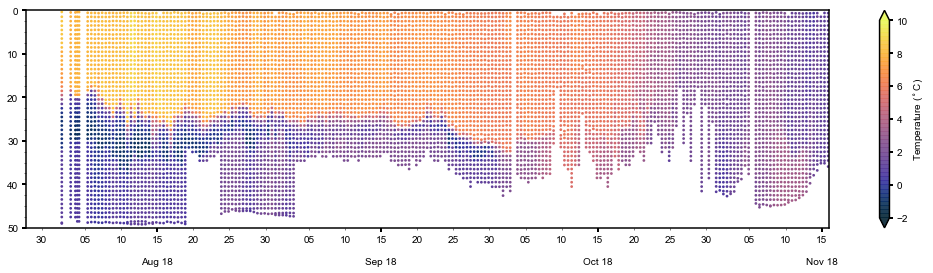

In [82]:
plot_temperature_saloverlay()

### Depth Integrated Temperature

In [130]:
#depth averaged temp for specific bins from 1m binned/interpolated data
#9121, 9150, 52, 53, 54 same as for 9197 and 9199
archive_path = '/Users/bell/in_and_outbox/data_sets/ALAMO/netcdf/'
#AlamoID = '9121'
dataxa = xa.open_mfdataset(archive_path + AlamoID + '/*.nc', concat_dim='N_LEVELS')
dataxa=dataxa.persist()

dgb = dataxa.groupby('CYCLE_NUMBER')

In [131]:
"""fig, ax = plt.subplots(figsize=(18, 4), facecolor='w', edgecolor='w')
for k,cycle in enumerate(dgb.groups):
    if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):
        IntTemp = np.interp(np.arange(5,16,1),dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle], dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle], left=np.nan, right=np.nan)
        #IntTemp = np.interp(np.arange(5,16,1),np.flip(dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle]), np.flip(dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle]), left=np.nan, right=np.nan)
        cs = ax.scatter(dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle].min(), np.nanmean(IntTemp), s=15, marker='o', edgecolor='none', facecolor='black')
        print(dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle].min(), np.nanmean(IntTemp))"""

"fig, ax = plt.subplots(figsize=(18, 4), facecolor='w', edgecolor='w')\nfor k,cycle in enumerate(dgb.groups):\n    if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):\n        IntTemp = np.interp(np.arange(5,16,1),dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle], dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle], left=np.nan, right=np.nan)\n        #IntTemp = np.interp(np.arange(5,16,1),np.flip(dataxa.PRES.values.T[dataxa.CYCLE_NUMBER==cycle]), np.flip(dataxa.TEMP.values.T[dataxa.CYCLE_NUMBER==cycle]), left=np.nan, right=np.nan)\n        cs = ax.scatter(dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle].min(), np.nanmean(IntTemp), s=15, marker='o', edgecolor='none', facecolor='black')\n        print(dataxa['JULD'].values[dataxa.CYCLE_NUMBER==cycle].min(), np.nanmean(IntTemp))"

### T/S plots

In [132]:
import seawater as sw

def plot_salvtemp(salt, temp, press, divenum, srange=[28,34], trange=[-2,15], ptitle=""): 
    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig, ax1 = plt.subplots(figsize=(8, 8), facecolor='w', edgecolor='w')
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='gray')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=press, cmap='gray', s=10)
    cbar = plt.colorbar(ts)
    cbar.ax.tick_params(labelsize=14) 

    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    plt.tick_params(axis='both', which='major', labelsize=14)
 
    ax1.set_xlabel('Salinity (PSU)',fontsize=16)
    ax1.set_ylabel('Temperature (C)',fontsize=16)

    
    t = fig.suptitle(ptitle, fontsize=18, fontweight='bold')
    return fig  

def plot_salvtemp_divenum(salt, temp, press, divenum, srange=[28,34], trange=[-2,15], ptitle=""): 

    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig, ax1 = plt.subplots(figsize=(8, 8), facecolor='w', edgecolor='w')
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='gray')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=divenum, cmap='rainbow', s=10)
    cbar = plt.colorbar(ts)
    cbar.ax.tick_params(labelsize=14) 

    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    plt.tick_params(axis='both', which='major', labelsize=14)
 
    ax1.set_xlabel('Salinity (PSU)',fontsize=16)
    ax1.set_ylabel('Temperature (C)',fontsize=16)

    
    t = fig.suptitle(ptitle, fontsize=18, fontweight='bold')
    return fig 

def plot_salvtemp_doy(salt, temp, press, doy, srange=[28,34], trange=[-2,15], ptitle=""): 

    plt.style.use('ggplot')
    
    # Figure out boudaries (mins and maxs)
    smin = srange[0]
    smax = srange[1]
    tmin = trange[0]
    tmax = trange[1]

    # Calculate how many gridcells we need in the x and y dimensions
    xdim = int(round((smax-smin)/0.1+1,0))
    ydim = int(round((tmax-tmin)+1,0))
    
    #print 'ydim: ' + str(ydim) + ' xdim: ' + str(xdim) + ' \n'
    if (xdim > 10000) or (ydim > 10000): 
        print('To many dimensions for grid in {cruise} {cast} file. Likely  missing data \n'.format(cruise=cruise,cast=cast))
        return
 
    # Create empty grid of zeros
    dens = np.zeros((ydim,xdim))
 
    # Create temp and salt vectors of appropiate dimensions
    ti = np.linspace(0,ydim-1,ydim)+tmin
    si = np.linspace(0,xdim-1,xdim)*0.1+smin
 
    # Loop to fill in grid with densities
    for j in range(0,int(ydim)):
        for i in range(0, int(xdim)):
            dens[j,i]=sw.dens0(si[i],ti[j])
 
    # Substract 1000 to convert to sigma-t
    dens = dens - 1000
 
    # Plot data ***********************************************
    fig, ax1 = plt.subplots(figsize=(8, 8), facecolor='w', edgecolor='w')
    CS = plt.contour(si,ti,dens, linestyles='dashed', colors='gray')
    plt.clabel(CS, fontsize=12, inline=1, fmt='%1.1f') # Label every second level
 
    ts = ax1.scatter(salt,temp, c=doy, cmap=cmocean.cm.phase, s=10,vmin=1,vmax=366)
    cbar = plt.colorbar(ts)
    cbar.ax.tick_params(labelsize=14) 

    plt.ylim(tmin,tmax)
    plt.xlim(smin,smax)
    plt.tick_params(axis='both', which='major', labelsize=14)
 
    ax1.set_xlabel('Salinity (PSU)',fontsize=16)
    ax1.set_ylabel('Temperature (C)',fontsize=16)

    
    t = fig.suptitle(ptitle, fontsize=18, fontweight='bold')
    return fig 

In [133]:
#filter data to remove outliers for each profile based on salinity (2sigma?)

import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in greater")
warnings.filterwarnings("ignore", message="invalid value encountered in less")

SalinityTemp = dataxa.PSAL.values.T
for k,cycle in enumerate(dgb.groups):
    if cycle % 100 == 0:
        print(cycle)
    if ~np.isnat(dataxa.JULD.values[dataxa.CYCLE_NUMBER==cycle][0]):
        Salinity = SalinityTemp[dataxa.CYCLE_NUMBER==cycle]
        Salinity[(Salinity>(np.nanmedian(Salinity)+np.nanstd(Salinity))) | (Salinity<(np.nanmedian(Salinity)-np.nanstd(Salinity)))] = np.nan
        SalinityTemp[dataxa.CYCLE_NUMBER==cycle] = Salinity
        

200.0
300.0


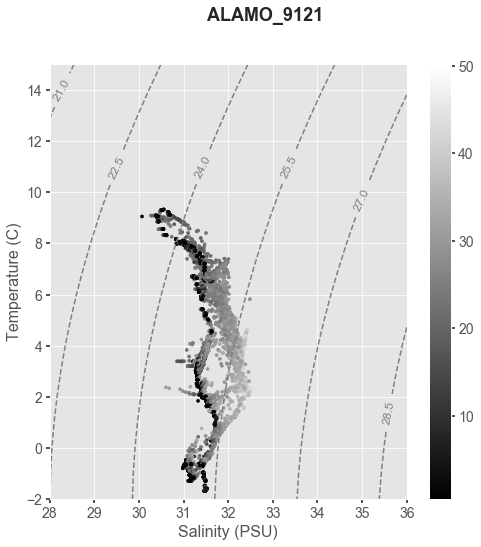

In [134]:
fig = plot_salvtemp(SalinityTemp,dataxa['TEMP'],dataxa['PRES'],dataxa['CYCLE_NUMBER'].T,
                                                srange=[28,36],ptitle='ALAMO_'+AlamoID)
fig.savefig(AlamoID+'_TSSigma_depth.png',dpi=300)

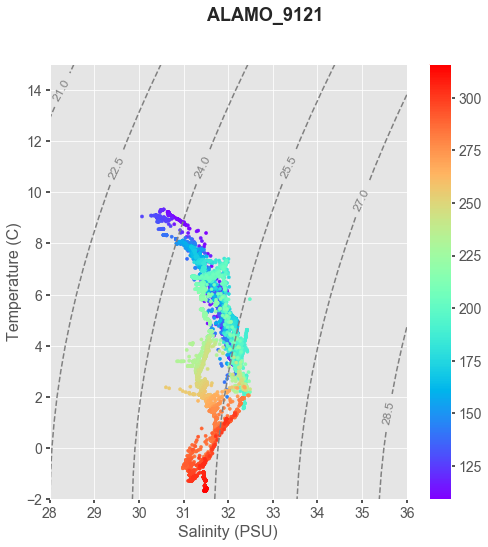

In [135]:
fig = plot_salvtemp_divenum(SalinityTemp.T,dataxa['TEMP'],dataxa['PRES'],dataxa['CYCLE_NUMBER'].T,
                            srange=[28,36],ptitle='ALAMO_'+AlamoID)
fig.savefig(AlamoID+'_TSSigma_cycle.png',dpi=300)

In [136]:
doy=[pd.to_datetime(x).dayofyear for x in dataxa.JULD.T.values[0]]

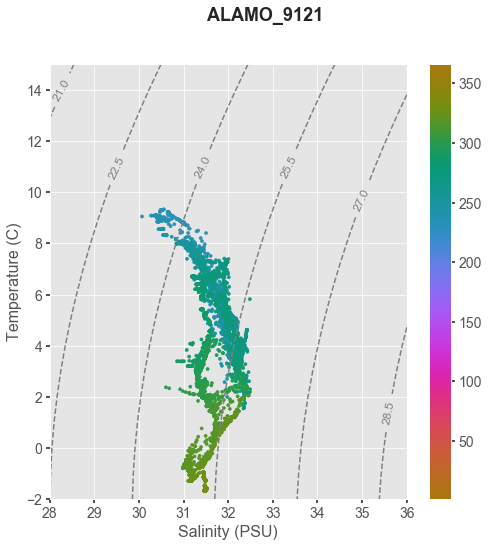

In [137]:
dataxa
fig = plot_salvtemp_doy(SalinityTemp.T,dataxa['TEMP'],dataxa['PRES'],np.array([doy]),
                            srange=[28,36],ptitle='ALAMO_'+AlamoID)
fig.savefig(AlamoID+'_TSSigma_doy.png',dpi=300)

In [138]:
(datetime.date(2018,1,1)).strftime('%j')

'001'

In [139]:
t.year

2018